![](unimed.png)

---
## Pré-processamento de dados

Neste hands-on, queremos aplicar técnicas de pré-processamento de dados para nos auxiliar em tarefas futuras.

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Parte 1 - Titanic

Nesta primeira parte, vamos focar principalmente nas tarefas de limpeza e transformação de dados. Vamos utilizar novamente os dados dos passageiros do Titanic que estão disponíveis no arquivo **titanic_data.csv**.

Primeiro precisamos fazer a leitura do arquivo, para isso utlizaremos a função do pandas **read_csv('nome_do_arquivo.csv')**, que faz a leitura dos dados e os armazena em um DataFrame.

In [2]:
"""Faça a leitura do arquivo salvando seu conteúdo na variável titanic e depois visualize suas 5 primeiras linhas"""

# YOUR CODE HERE
titanic = pd.read_csv("titanic_data.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
"""Renomeie as colunas do DataFrame para facilitar o entendimento"""

titanic.columns = ['IdPassageiro','Sobreviveu?','Classe','Nome','Sexo','Idade','Irmãos/Cônjuge','Pais/Crianças','Bilhete','Tarifa','Cabine','Embarque']
titanic.head()

,IdPassageiro,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
"""Verifique os tipos de cada coluna do dataframe com o auxilio do atributo dtypes"""

# YOUR CODE HERE
titanic.dtypes

IdPassageiro        int64
Sobreviveu?         int64
Classe              int64
Nome               object
Sexo               object
Idade             float64
Irmãos/Cônjuge      int64
Pais/Crianças       int64
Bilhete            object
Tarifa            float64
Cabine             object
Embarque           object
dtype: object

In [5]:
"""Remova as colunas IdPassageiro, Bilhete e Cabine do DataFrame"""

# YOUR CODE HERE
titanic = titanic.drop(["IdPassageiro", "Bilhete", "Cabine"], axis=1)

In [6]:
titanic

,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


Quando estamos trabalhando com dados, é importante saber algumas informações importantes sobre eles. Por exemplo, valores máximo e mínimo de cada atributo, sua média, desvio padrão, dentre outras. A função `describe` do pandas nos ajuda com essa tarefa.

In [7]:
"""Verifique as informações importantes dos atributos do dataframe do titanic"""

# YOUR CODE HERE
titanic.describe()

,Sobreviveu?,Classe,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observe que, apesar de o DataFrame possuir 891 registros, a coluna *idade* retorna uma quantidade de 714 registros. Isso pode ocorrer devido à presença de valores nulos/inválidos no conjunto de dados. No caso do Titanic, pode ser que a idade de certos passageiros fosse desconhecida ou não tenha sido recuperada.

Dados faltantes ou incorretos acontecem com bastante frequência, e é nossa tarefa tratá-los da forma correta. Aqui, vamos definir a idade dos passageiros que estão faltando com o valor 0.

In [8]:
"""Substitua os valores nulos de Idade por zero e verifique novamente as estatísticas para o DataFrame"""

# YOUR CODE HERE
titanic[["Idade"]] = titanic[["Idade"]].fillna(value=0)
titanic.describe()

,Sobreviveu?,Classe,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,23.799293,0.523008,0.381594,32.204208
std,0.486592,0.836071,17.596074,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


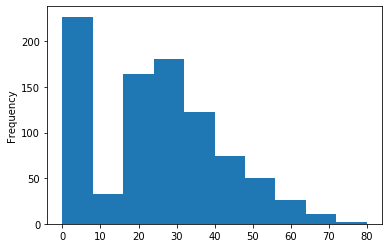

In [9]:
""" Plote um histograma com os dados da coluna Idade do DataFrame. Logo após, utilize o comando plt.show() 
para exibir a figura sem saídas de texto antes. 
    Dica: o pandas possui uma função que ajuda bastante nessa tarefa. """

# YOUR CODE HERE
titanic["Idade"].plot(kind="hist")
plt.show()

Podemos querer normalizar atributos para oberservá-los em um intervalo de valores mais bem controlado. Vamos então normalizar o valor da coluna Tarifa no intervalo $[0,1]$ utilizando a normalização **min-max**, que é dada pela **fórmula**:

$$v' = \frac{v-min_A}{max_A - min_A}(nmax_A - nmin_A) + nmin_A$$

onde:
* $[nmin_A, nmax_A]$ é o intervalo no qual você deseja normalizar seus dados (no nosso caso, $[0,1]$)
* $min_A$ e $max_A$ são os atuais valores mínimo e máximo da coluna, respectivamente.

In [10]:
""" Crie uma nova coluna 'IdadeNorm' no DataFrame com os valores normalizados da coluna Idade 
aplicando a fórmula descrita acima. 
    Salve os valores máximo e mínimo da coluna em variáveis antes de efetuar a transformação.
    Mostre as primeiras linhas do dataframe para verificar o resultado."""

# YOUR CODE HERE
titanic["IdadeNorm"] = (titanic["Idade"] - titanic["Idade"].min()) / (titanic["Idade"].max() - titanic["Idade"].min()) * (1 - 0) + 0

titanic.head()

,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque,IdadeNorm
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0.2750
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0.4750
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0.3250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0.4375
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0.4375


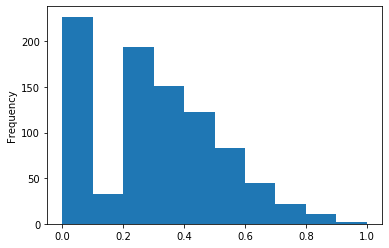

In [11]:
""" Plote um histograma com os dados normalizados da coluna Idade do DataFrame. 
Logo após, utilize o comando plt.show() para exibir a figura sem saídas de texto antes. """

# YOUR CODE HERE
titanic["IdadeNorm"].plot(kind="hist")
plt.show()

Outra técnica importante é a **discretização** dos dados.

In [12]:
""" Crie uma nova coluna 'IdadeDisc' no DataFrame com os valores normalizados da coluna Idade 
aplicando a fórmula descrita acima. 
    Para pessoas entre 0 e 17 anos, atribua o valor 'Criança'.
    Para pessoas entre 18 e 59 anos, atribua o valor 'Adulto'.
    Para pessoas entre 60 e 80 anos, atribua o valor 'Idoso'.
    Mostre as primeiras linhas do dataframe para verificar o resultado."""

# YOUR CODE HERE
def getFaixaEtaria(idade):
    if idade < 18:
        return "Criança"
    elif idade < 60:
        return "Adulto"
    else:
        return "Idoso"

titanic["IdadeDisc"] = [getFaixaEtaria(e) for e in titanic["Idade"]] 
titanic.head()

,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque,IdadeNorm,IdadeDisc
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0.2750,Adulto
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0.4750,Adulto
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0.3250,Adulto
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0.4375,Adulto
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0.4375,Adulto


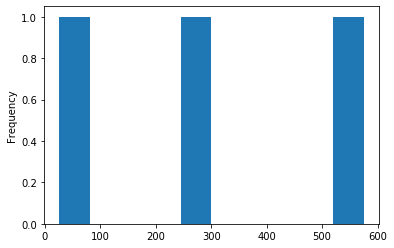

In [13]:
""" Plote um histograma com os dados discretizados da coluna IdadeDisc do DataFrame. 
Logo após, utilize o comando plt.show() para exibir a figura sem saídas de texto antes. 
    Dica: confira a função value_counts() do pandas."""

# YOUR CODE HERE
titanic["IdadeDisc"].value_counts().plot(kind="hist")
plt.show()

Após a discretização dos dados, podemos fazer o processo de **binarização**, isto é, criar uma coluna para cada categoria que contém os valores 0 ou 1 que indicam se cada linha pertence ou não a esta categoria. Isso é importante pois a grande maioria dos algoritmos e funções dos pacotes do Python não aceitam dados categóricos, sendo necessário discretizá-los.

In [14]:
"""Para cada uma das categorias criadas anteriormente (Criança, Adulto e Idoso), crie uma nova coluna
que indicará se a linha faz parte da categoria (recebendo o valor 1) ou não (valor 0). 
    Mostre as primeiras linhas do dataframe para verificar o resultado."""

# YOUR CODE HERE
titanic["Crianca"] = [int(e == "Criança") for e in titanic["IdadeDisc"]]
titanic["Adulto"] = [int(e == "Adulto") for e in titanic["IdadeDisc"]]
titanic["Idoso"] = [int(e == "Idoso") for e in titanic["IdadeDisc"]]
titanic.head()

,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque,IdadeNorm,IdadeDisc,Crianca,Adulto,Idoso
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0.2750,Adulto,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0.4750,Adulto,0,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0.3250,Adulto,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0.4375,Adulto,0,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0.4375,Adulto,0,1,0


---
## Parte 2 - Iris

Nesta parte, vamos utilizar dados sobre a classificação de plantas *Iris* a partir de suas características.

Descrição dos Dados: http://archive.ics.uci.edu/ml/datasets/Iris

Os dados estarão disponíveis no arquivo **iris.csv**

Para este exercícios utilizaremos a biblioteca **pandas** para a leitura e manipulação dos dados. Para o trabalho de redução de dimensionalidade com **PCA** utilizaremos a implementação disponibilizada pelo <a href="http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">Scikit-Learn</a>.

Como este é nosso primeiro contato com a base **iris**, é importante conhecermos sua estrutura e quais as informações presentes. Ao trabalharmos com DataFrames pandas podemos utilizar a função **head()** para termos uma visão de como o arquivo está configurado, exibindo por default as 5 primeiras linhas do DataFrame.

**Obs.**: a função **head()** pode receber como parâmetro o nº de linhas a ser exibido, caso queiramos ver as 10 primeiras linhas do DataFrame basta utilizarmos **head(10)**.

In [17]:
"""Faça a leitura do arquivo salvando seu conteúdo na variável data e depois visualize suas 5 primeiras linhas"""

# YOUR CODE HERE
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


O **PCA** (Principal Component Analysis), método de redução de dimensionalidade que utilizaremos mais adiante, deve ser aplicado apenas em dados numéricos. Portanto, devemos ter certeza de que todas as colunas do nosso dataframe satisfazem a este requisito.

In [18]:
"""Verifique o tipo dos dados de cada coluna do dataframe"""

# YOUR CODE HERE
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

A princípio a coluna **species** não será necessária, devemos então salvá-la em uma nova variável e depois dropá-la de nosso dataframe. 

In [19]:
"""Crie uma nova variável chamada species que receba os dados contidos na coluna 'species' de seu Dataframe"""

# YOUR CODE HERE
species = iris["species"]

Agora já podemos dropá-la do nosso DataFrame. Para isto utilizaremos a função **drop(columns = , axis = , inplace = )**.

**columns:** recebe a lista de colunas a serem dropadas.

**axis:** indica em qual eixo o drop será realizado, <b>1</b> para colunas e **0** para linhas

**inplace:** quando **True** a operação não gera nenhum retorno, sendo realizada na própria variável. Quando **False** (default) a alteração é efetuada apenas no retorno, precisando ser salva em alguma variável.

In [20]:
"""Crie uma variável df onde a mesma receba o retorno da função drop descrita acima. 
Em seguida realize a operação de forma implícita, gerando ao final 2 dataframes iguais."""
df = iris.drop('species', axis = 1)

# YOUR CODE HERE
iris.drop('species', axis = 1, inplace=True)

In [21]:
"""Verifica se os dois dataframes possuem as mesmas colunas"""
assert iris.columns.all() == df.columns.all()

"""Deletamos a variável df pois ela não será mais utilizada."""
del df

Ok, agora que já sabemos que nossos dados são numéricos, podemos olhar para a correlação entre as colunas. Podemos fazer isso de duas formas, olhando para sua matriz de correlação e/ou plotando sua matriz de dispersão.

In [22]:
"""Para gerar a matriz de correlação de um DataFrame basta utilizar a função .corr()"""
print(iris.corr())

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


Quando começamos a trabalhar com uma biblioteca, é de grande importância que saibamos utilizar sua documentação como auxílio. Clique <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.plotting.scatter_matrix.html">aqui</a> para acessar a documentação do **scatter_matrix** e gerar a matriz de dispersão dos seus dados. A imagem deverá ter tamanho (10,10) e apresentar em sua diagonal a estimativa de densidade do kernel.

**Dica 1:** não se esqueça de utilizar a função plt.show() ao final da célula para que o plot seja gerado de forma limpa (sem gerar retornos em texto da função).

**Dica 2:** alterne o valor do parâmetro alpha para obter uma melhor visualização dos pontos.

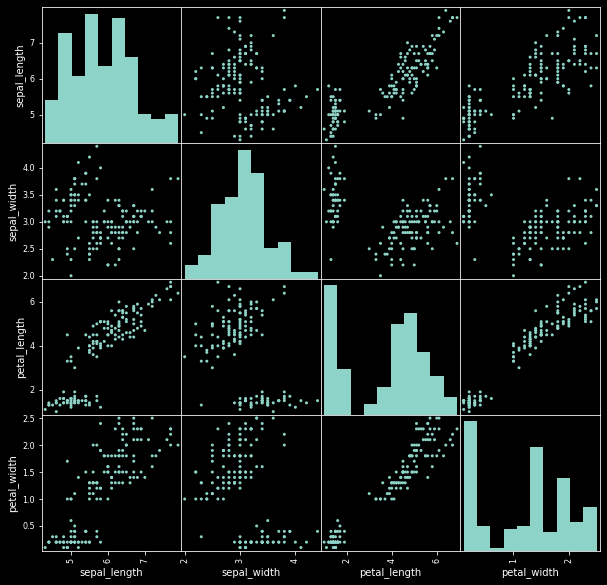

In [14]:
# YOUR CODE HERE
pd.plotting.scatter_matrix(iris, alpha=1, figsize=(10,10), diagonal="hist")
plt.show()

---
## Utilizando o PCA

Agora vamos utilizar o PCA para reduzir a dimensionalidade dos nossos dados. Não se preocupe em saber os detalhes do PCA, pois vamos aprender com mais profundidade em uma próxima aula. Novamente, vamos nos guiar pela documentação da biblioteca, que você pode acessar clicando <a href="http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">aqui</a>.

Em um primeiro momento, não devemos passar nenhum valor para o parâmetro **n_components**, dessa forma, podemos visualizar todos os componentes principais gerados e posteriormente decidirmos o número de componentes a serem utilizados.

In [16]:
"""Crie uma variável pca que receba a função PCA(), em seguida treine o modelo com seus dados 
e analise a porcentagem de variância explicada por cada componente principal.
Dica: arrays possuem a função .cumsum() que permite visualizar o valor acumulativos de seus itens."""

pca = PCA()
pca.fit(iris)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[0.92461621 0.05301557 0.01718514 0.00518309]
[0.92461621 0.97763178 0.99481691 1.        ]


In [17]:
assert pca.n_components_ == 4

Baseando-se na análise realizada acima, já podemos reduzir a dimensionalidade de nossos dados. Agora o parâmetro **n_components** deve ser alterado recebendo como valor o número de componentes principais necessários para explicar no mínimo 97% da variância dos dados. Após a alteração do parâmetro, o modelo deve ser retreinado e em seguida, podemos realizar a transformação dos dados.

In [19]:
"""Crie uma nova variável chamada data_pca, a variável deverá receber os dados transformados pelo PCA,
contendo componentes principais suficientes para explicar 97% da variância dos dados."""

pca = PCA(n_components=2)
data_pca = pca.fit_transform(iris)

In [20]:
"""O número de componentes principais não pode ser 4."""
assert pca.n_components_ != 4

In [21]:
"""Como podemos ver abaixo, após realizar a transformação dos dados, 
a biblioteca PCA nos retorna um numpy.ndarray"""
type(data_pca)

numpy.ndarray

Agora que reduzimos a dimensionalidade dos dados, podemos gerar uma visualização aproximada de como os pontos estão distribuídos no espaço, utilizando a função abaixo.

In [22]:
"""Gera scatter plot utilizando como coordenada os 2 primeiros componentes principais"""
def plot_scatter(data_pca):
    #subplot permite que montemos o plot durante o processo de iteração.
    ax = plt.subplot()
    
    #Gera pontos de cores diferentes para cada espécie
    for spec in data_pca['species'].unique():    
        ax.scatter(data_pca[data_pca['species'] == spec]['PC1'], 
                   data_pca[data_pca['species'] == spec]['PC2'],
                  label = spec)
    
    #Determina o local onde a legenda será plotada. loc = 0: canto inferior direito
    plt.legend(loc=0)
    plt.show()

A função **plot_scatter** recebe como parâmetro um DataFrame **data_pca** com 3 colunas, **PC1, PC2, species**. Você deve converter o numpy.ndarray obtido anteriormente em um DataFrame de mesma configuração para que possa utilizar a função e gerar o scatter plot.

In [25]:
"""Converta a variável data_pca em um DataFrame de colunas PC1, PC2 e species"""

# YOUR CODE HERE
data_pca = pd.DataFrame({"PC1": data_pca[:, 0], "PC2": data_pca[:, 1], "species": species})

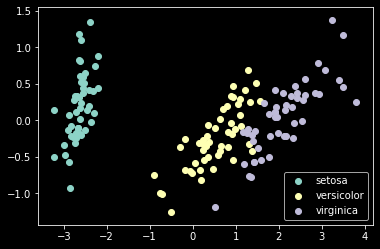

In [26]:
try:
    plot_scatter(data_pca)
except:
    raise ValueError("O DataFrame não cumpri os requisitos necessários.")